In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from datetime import datetime

def time_to_seconds(t):
    dt = datetime.strptime(t, "%H:%M:%S.%f")
    return dt.hour * 3600 + dt.minute * 60 + dt.second + dt.microsecond / 1e6

vectorized_time_to_seconds = np.vectorize(time_to_seconds)

In [3]:
file_dir = "../simulation/measurements/files"

particle_counts = [1500, 3500, 7500, 17000, 37000, 85000, 190000, 420000, 950000, 2200000, 5000000]
modes = ["computeShaders", "sequential", "parallel"]

In [4]:
# 06-12 18:24:49.724  7352  7409 I Timer   : Elapsed time: 17.248888 ms
# 06-12 18:24:49.738  7352  7409 I GpuTimerCompute: Elapsed time: 0.000313 ms
# 06-12 18:24:49.741  7352  7409 I GpuTimerRender: Elapsed time: 1.439792 ms
# 06-12 18:24:49.759  7352  7409 I CpuTimer: Elapsed time: 23.402828 ms
# 06-12 18:24:49.941  7352  7436 I CpuTimerLoader: Elapsed time: 1284.709000 ms

pd_cs = pd.DataFrame(columns=["particle_count",
                            "avg_time", "avg_time_err",
                            "avg_time_per_particle", "avg_time_per_particle_err",
                            "avg_time_compute", "avg_time_compute_err",
                            "avg_time_per_particle_compute", "avg_time_per_particle_compute_err",
                            "avg_time_render", "avg_time_render_err",
                            "avg_time_per_particle_render", "avg_time_per_particle_render_err",
                            "avg_time_cpu", "avg_time_cpu_err",
                            "avg_time_per_particle_cpu", "avg_time_per_particle_cpu_err",
                            "avg_time_loader", "avg_time_loader_err",
                            ])

pd_seq = pd.DataFrame(columns=["particle_count",
                            "avg_time", "avg_time_err",
                            "avg_time_per_particle", "avg_time_per_particle_err",
                            "avg_time_compute", "avg_time_compute_err",
                            "avg_time_per_particle_compute", "avg_time_per_particle_compute_err",
                            "avg_time_render", "avg_time_render_err",
                            "avg_time_per_particle_render", "avg_time_per_particle_render_err",
                            "avg_time_cpu", "avg_time_cpu_err",
                            "avg_time_per_particle_cpu", "avg_time_per_particle_cpu_err",
                            "avg_time_loader", "avg_time_loader_err",
                            ])

pd_par = pd.DataFrame(columns=["particle_count",
                            "avg_time", "avg_time_err",
                            "avg_time_per_particle", "avg_time_per_particle_err",
                            "avg_time_compute", "avg_time_compute_err",
                            "avg_time_per_particle_compute", "avg_time_per_particle_compute_err",
                            "avg_time_render", "avg_time_render_err",
                            "avg_time_per_particle_render", "avg_time_per_particle_render_err",
                            "avg_time_cpu", "avg_time_cpu_err",
                            "avg_time_per_particle_cpu", "avg_time_per_particle_cpu_err",
                            "avg_time_loader", "avg_time_loader_err",
                            ])

pd_cs["particle_count"] = particle_counts
pd_seq["particle_count"] = particle_counts
pd_par["particle_count"] = particle_counts

thousands = []
thousands_time_stamps = []
hundred_thousands = []
hundred_thousands_time_stamps = []
millions = []
millions_time_stamps = []

for mode in modes:
    avg_times = []
    avg_times_err = []
    avg_times_per_particle = []
    avg_times_per_particle_err = []

    avg_times_compute = []
    avg_times_compute_err = []
    avg_times_per_particle_compute = []
    avg_times_per_particle_compute_err = []

    avg_times_render = []
    avg_times_render_err = []
    avg_times_per_particle_render = []
    avg_times_per_particle_render_err = []

    avg_times_cpu = []
    avg_times_cpu_err = []
    avg_times_per_particle_cpu = []
    avg_times_per_particle_cpu_err = []

    avg_times_loader = []
    avg_times_loader_err = []
    avg_times_per_particle_loader = []
    avg_times_per_particle_loader_err = []

    for count in particle_counts:
        file = open(f"{file_dir}/logs_{count}_{mode}2.txt", "r").read()

        all_times = []
        all_times_compute = []
        all_times_render = []
        all_times_cpu = []
        all_times_loader = []
        all_time_stamps = []
        for line in file.split("\n"):
            if "CpuTimerLoader" in line:
                if "ms" in line:
                    time = float(line.split("Elapsed time: ")[1].split(" ")[0])
                    time_stamp = line.split(" ")[1]
                    all_times_loader.append(time)

            elif "CpuTimer" in line:
                if "ms" in line:
                    time = float(line.split("Elapsed time: ")[1].split(" ")[0])
                    time_stamp = line.split(" ")[1]
                    all_times_cpu.append(time)

            elif "GpuTimerRender" in line:
                if "ms" in line:
                    time = float(line.split("Elapsed time: ")[1].split(" ")[0])
                    time_stamp = line.split(" ")[1]
                    all_times_render.append(time)

            elif "GpuTimerCompute" in line:
                if "ms" in line:
                    time = float(line.split("Elapsed time: ")[1].split(" ")[0])
                    time_stamp = line.split(" ")[1]
                    all_times_compute.append(time)

            else:
                # "Timer" in line
                if "ms" in line:
                    time = float(line.split("Elapsed time: ")[1].split(" ")[0])
                    time_stamp = line.split(" ")[1]
                    all_times.append(time)
                    all_time_stamps.append(time_stamp)

        if count == 1500:
            thousands.append(all_times)
            thousands_time_stamps.append(all_time_stamps)
        if count == 190000:
            hundred_thousands.append(all_times)
            hundred_thousands_time_stamps.append(all_time_stamps)
        if count == 950000:
            millions.append(all_times)
            millions_time_stamps.append(all_time_stamps)

        ####################################################### Means
        avg_time = np.mean(all_times)
        avg_time_err = np.std(all_times)
        avg_time_per_particle = avg_time / count
        avg_time_per_particle_err = avg_time_err / count

        avg_time_loader = np.mean(all_times_loader)
        avg_time_loader_err = np.std(all_times_loader)
        avg_time_per_particle_loader = avg_time_loader / count
        avg_time_per_particle_loader_err = avg_time_loader_err / count

        avg_time_cpu = np.mean(all_times_cpu)
        avg_time_cpu_err = np.std(all_times_cpu)
        avg_time_per_particle_cpu = avg_time_cpu / count
        avg_time_per_particle_cpu_err = avg_time_cpu_err / count

        avg_time_render = np.mean(all_times_render)
        avg_time_render_err = np.std(all_times_render)
        avg_time_per_particle_render = avg_time_render / count
        avg_time_per_particle_render_err = avg_time_render_err / count

        avg_time_compute = np.mean(all_times_compute)
        avg_time_compute_err = np.std(all_times_compute)
        avg_time_per_particle_compute = avg_time_compute / count
        avg_time_per_particle_compute_err = avg_time_compute_err / count

        ####################################################### Appends
        avg_times_loader.append(avg_time_loader)
        avg_times_loader_err.append(avg_time_loader_err)
        avg_times_per_particle_loader.append(avg_time_per_particle_loader)
        avg_times_per_particle_loader_err.append(avg_time_per_particle_loader_err)

        avg_times_cpu.append(avg_time_cpu)
        avg_times_cpu_err.append(avg_time_cpu_err)
        avg_times_per_particle_cpu.append(avg_time_per_particle_cpu)
        avg_times_per_particle_cpu_err.append(avg_time_per_particle_cpu_err)

        avg_times_render.append(avg_time_render)
        avg_times_render_err.append(avg_time_render_err)
        avg_times_per_particle_render.append(avg_time_per_particle_render)
        avg_times_per_particle_render_err.append(avg_time_per_particle_render_err)

        avg_times_compute.append(avg_time_compute)
        avg_times_compute_err.append(avg_time_compute_err)
        avg_times_per_particle_compute.append(avg_time_per_particle_compute)
        avg_times_per_particle_compute_err.append(avg_time_per_particle_compute_err)

        avg_times.append(avg_time)
        avg_times_err.append(avg_time_err)
        avg_times_per_particle.append(avg_time_per_particle)
        avg_times_per_particle_err.append(avg_time_per_particle_err)
        #######################################################

    if mode == "computeShaders":
        pd_cs["avg_time"] = avg_times
        pd_cs["avg_time_err"] = avg_times_err
        pd_cs["avg_time_per_particle"] = avg_times_per_particle
        pd_cs["avg_time_per_particle_err"] = avg_times_per_particle_err

        pd_cs["avg_time_loader"] = avg_times_loader
        pd_cs["avg_time_loader_err"] = avg_times_loader_err
        pd_cs["avg_time_per_particle_loader"] = avg_times_per_particle_loader
        pd_cs["avg_time_per_particle_loader_err"] = avg_times_per_particle_loader_err

        pd_cs["avg_time_cpu"] = avg_times_cpu
        pd_cs["avg_time_cpu_err"] = avg_times_cpu_err
        pd_cs["avg_time_per_particle_cpu"] = avg_times_per_particle_cpu
        pd_cs["avg_time_per_particle_cpu_err"] = avg_times_per_particle_cpu_err

        pd_cs["avg_time_render"] = avg_times_render
        pd_cs["avg_time_render_err"] = avg_times_render_err
        pd_cs["avg_time_per_particle_render"] = avg_times_per_particle_render
        pd_cs["avg_time_per_particle_render_err"] = avg_times_per_particle_render_err

        pd_cs["avg_time_compute"] = avg_times_compute
        pd_cs["avg_time_compute_err"] = avg_times_compute_err
        pd_cs["avg_time_per_particle_compute"] = avg_times_per_particle_compute
        pd_cs["avg_time_per_particle_compute_err"] = avg_times_per_particle_compute_err

    elif mode == "sequential":
        pd_seq["avg_time"] = avg_times
        pd_seq["avg_time_err"] = avg_times_err
        pd_seq["avg_time_per_particle"] = avg_times_per_particle
        pd_seq["avg_time_per_particle_err"] = avg_times_per_particle_err

        pd_seq["avg_time_loader"] = avg_times_loader
        pd_seq["avg_time_loader_err"] = avg_times_loader_err
        pd_seq["avg_time_per_particle_loader"] = avg_times_per_particle_loader
        pd_seq["avg_time_per_particle_loader_err"] = avg_times_per_particle_loader_err

        pd_seq["avg_time_cpu"] = avg_times_cpu
        pd_seq["avg_time_cpu_err"] = avg_times_cpu_err
        pd_seq["avg_time_per_particle_cpu"] = avg_times_per_particle_cpu
        pd_seq["avg_time_per_particle_cpu_err"] = avg_times_per_particle_cpu_err

        pd_seq["avg_time_render"] = avg_times_render
        pd_seq["avg_time_render_err"] = avg_times_render_err
        pd_seq["avg_time_per_particle_render"] = avg_times_per_particle_render
        pd_seq["avg_time_per_particle_render_err"] = avg_times_per_particle_render_err

        pd_seq["avg_time_compute"] = avg_times_compute
        pd_seq["avg_time_compute_err"] = avg_times_compute_err
        pd_seq["avg_time_per_particle_compute"] = avg_times_per_particle_compute
        pd_seq["avg_time_per_particle_compute_err"] = avg_times_per_particle_compute_err

    elif mode == "parallel":
        pd_par["avg_time"] = avg_times
        pd_par["avg_time_err"] = avg_times_err
        pd_par["avg_time_per_particle"] = avg_times_per_particle
        pd_par["avg_time_per_particle_err"] = avg_times_per_particle_err

        pd_par["avg_time_loader"] = avg_times_loader
        pd_par["avg_time_loader_err"] = avg_times_loader_err
        pd_par["avg_time_per_particle_loader"] = avg_times_per_particle_loader
        pd_par["avg_time_per_particle_loader_err"] = avg_times_per_particle_loader_err

        pd_par["avg_time_cpu"] = avg_times_cpu
        pd_par["avg_time_cpu_err"] = avg_times_cpu_err
        pd_par["avg_time_per_particle_cpu"] = avg_times_per_particle_cpu
        pd_par["avg_time_per_particle_cpu_err"] = avg_times_per_particle_cpu_err

        pd_par["avg_time_render"] = avg_times_render
        pd_par["avg_time_render_err"] = avg_times_render_err
        pd_par["avg_time_per_particle_render"] = avg_times_per_particle_render
        pd_par["avg_time_per_particle_render_err"] = avg_times_per_particle_render_err

        pd_par["avg_time_compute"] = avg_times_compute
        pd_par["avg_time_compute_err"] = avg_times_compute_err
        pd_par["avg_time_per_particle_compute"] = avg_times_per_particle_compute
        pd_par["avg_time_per_particle_compute_err"] = avg_times_per_particle_compute_err
        

/home/martin/Lagrangian-fluid-simulation-for-Android/utils/.venv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/martin/Lagrangian-fluid-simulation-for-Android/utils/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/martin/Lagrangian-fluid-simulation-for-Android/utils/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/martin/Lagrangian-fluid-simulation-for-Android/utils/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/martin/Lagrangian-fluid-simulation-for-Android/utils/.venv/lib/python3.12/site-packages/numpy/core/_me

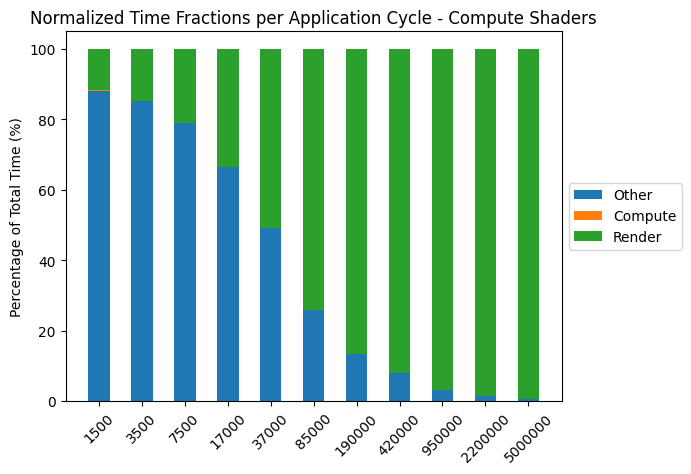

In [5]:
# Stacked bars compute shaders
chunk = 11
species = [str(x) for x in particle_counts[0:chunk]]
weight_counts = {
    "Other": np.array(pd_cs["avg_time_cpu"])[0:chunk] / 2,
    "Compute": np.array(pd_cs["avg_time_compute"])[0:chunk],
    "Render": np.array(pd_cs["avg_time_render"])[0:chunk], 
}
total_time = sum(weight_counts.values())
normalized_weights = {key: (weight / total_time) * 100 for key, weight in weight_counts.items()}

width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(len(species))

for key, weight in normalized_weights.items():
    ax.bar(species, weight, width=width, bottom=bottom, label=key)
    bottom += weight

ax.set_ylabel('Percentage of Total Time (%)')
ax.set_title('Normalized Time Fractions per Application Cycle - Compute Shaders')
plt.xticks(rotation=45)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

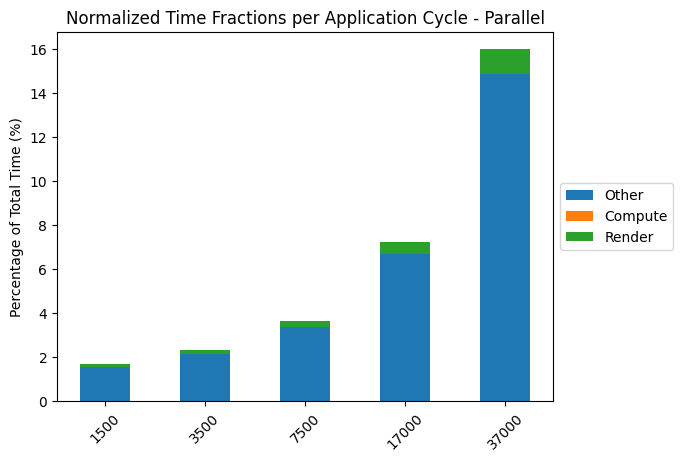

In [6]:
# Stacked bars parallel
chunk = 5
species = [str(x) for x in particle_counts[0:chunk]]
weight_counts = {
    "Other": np.array(pd_par["avg_time_cpu"] - pd_par["avg_time_compute"])[0:chunk] / 2,
    "Compute": np.array(pd_par["avg_time_compute"])[0:chunk]/8,
    "Render": np.array(pd_par["avg_time_render"])[0:chunk], 
}
total_time = sum(weight_counts.values())
normalized_weights = {key: (weight / total_time) * 100 for key, weight in weight_counts.items()}

width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(len(species))

for key, weight in weight_counts.items():
    ax.bar(species, weight, width=width, bottom=bottom, label=key)
    bottom += weight

ax.set_ylabel('Percentage of Total Time (%)')
ax.set_title('Normalized Time Fractions per Application Cycle - Parallel')
plt.xticks(rotation=45)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# OUTDATED BELOW THIS CELL

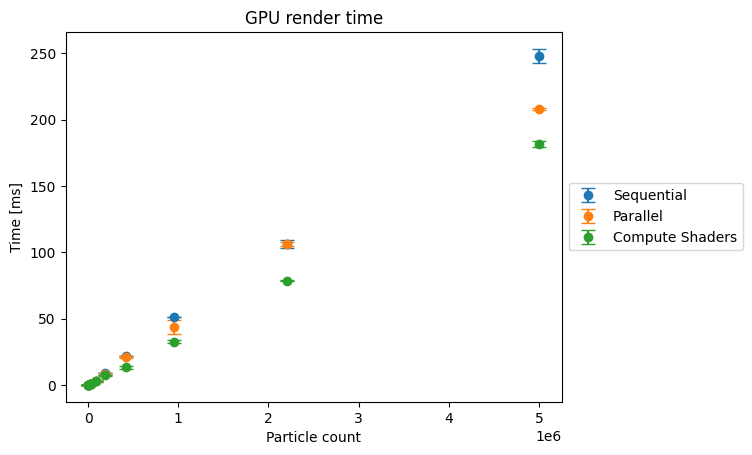

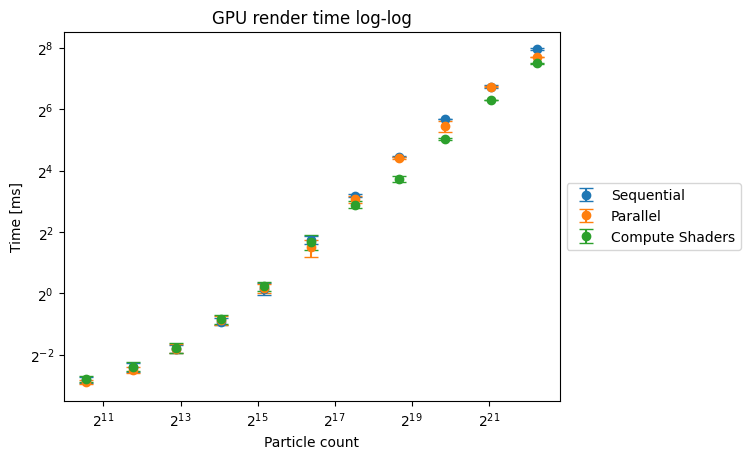

In [7]:
# GPU render time
plt.errorbar(pd_seq["particle_count"], pd_seq["avg_time_render"], pd_seq["avg_time_render_err"], label="Sequential", fmt='o', capsize=5)
plt.errorbar(pd_par["particle_count"], pd_par["avg_time_render"], pd_par["avg_time_render_err"], label="Parallel", fmt='o', capsize=5)
plt.errorbar(pd_cs["particle_count"], pd_cs["avg_time_render"], pd_cs["avg_time_render_err"], label="Compute Shaders", fmt='o', capsize=5)

plt.xlabel("Particle count")
plt.ylabel("Time [ms]")
plt.title("GPU render time")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# GPU render time log-log scale
plt.errorbar(pd_seq["particle_count"], pd_seq["avg_time_render"], pd_seq["avg_time_render_err"], label="Sequential", fmt='o', capsize=5)
plt.errorbar(pd_par["particle_count"], pd_par["avg_time_render"], pd_par["avg_time_render_err"], label="Parallel", fmt='o', capsize=5)
plt.errorbar(pd_cs["particle_count"], pd_cs["avg_time_render"], pd_cs["avg_time_render_err"], label="Compute Shaders", fmt='o', capsize=5)

plt.xlabel("Particle count")
plt.ylabel("Time [ms]")
plt.title("GPU render time log-log")

plt.xscale('log', base=2)
plt.yscale('log', base=2)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# # GPU render time per particle
# plt.errorbar(pd_seq["particle_count"], pd_seq["avg_time_per_particle_render"], pd_seq["avg_time_per_particle_render_err"], label="Sequential", fmt='o', capsize=5)
# plt.errorbar(pd_par["particle_count"], pd_par["avg_time_per_particle_render"], pd_par["avg_time_per_particle_render_err"], label="Parallel", fmt='o', capsize=5)
# plt.errorbar(pd_cs["particle_count"], pd_cs["avg_time_per_particle_render"], pd_cs["avg_time_per_particle_render_err"], label="Compute Shaders", fmt='o', capsize=5)

# plt.xlabel("Particle count")
# plt.ylabel("Time per particle [ms]")
# plt.title("GPU render time per particle")

# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.show()

# # GPU render time per particle log-log scale
# plt.errorbar(pd_seq["particle_count"], pd_seq["avg_time_per_particle_render"], pd_seq["avg_time_per_particle_render_err"], label="Sequential", fmt='o', capsize=5)
# plt.errorbar(pd_par["particle_count"], pd_par["avg_time_per_particle_render"], pd_par["avg_time_per_particle_render_err"], label="Parallel", fmt='o', capsize=5)
# plt.errorbar(pd_cs["particle_count"], pd_cs["avg_time_per_particle_render"], pd_cs["avg_time_per_particle_render_err"], label="Compute Shaders", fmt='o', capsize=5)

# plt.xlabel("Particle count")
# plt.ylabel("Time per particle [ms]")
# plt.title("GPU render time per particle log-log")

# plt.xscale('log', base=2)
# plt.yscale('log', base=2)

# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.show()

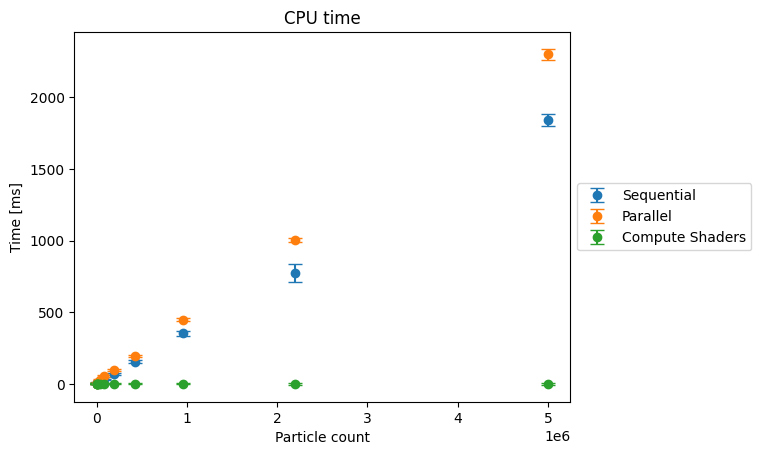

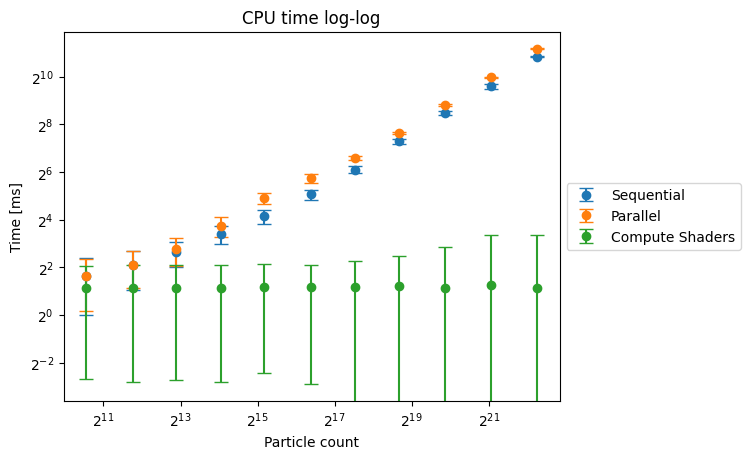

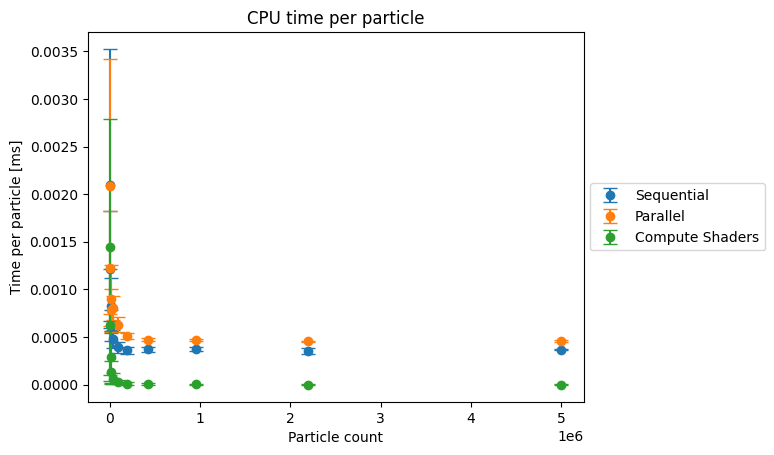

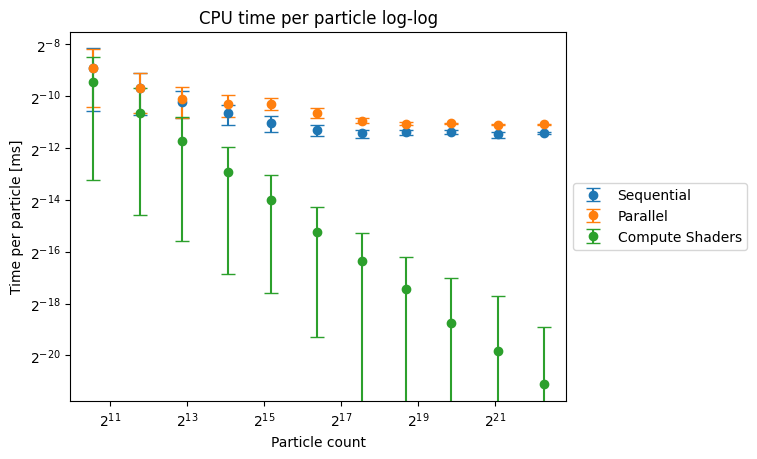

In [8]:
# CPU time
plt.errorbar(pd_seq["particle_count"], pd_seq["avg_time_cpu"], pd_seq["avg_time_cpu_err"], label="Sequential", fmt='o', capsize=5)
plt.errorbar(pd_par["particle_count"], pd_par["avg_time_cpu"], pd_par["avg_time_cpu_err"], label="Parallel", fmt='o', capsize=5)
plt.errorbar(pd_cs["particle_count"], pd_cs["avg_time_cpu"], pd_cs["avg_time_cpu_err"], label="Compute Shaders", fmt='o', capsize=5)

plt.xlabel("Particle count")
plt.ylabel("Time [ms]")
plt.title("CPU time")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# CPU time log-log scale
plt.errorbar(pd_seq["particle_count"], pd_seq["avg_time_cpu"], pd_seq["avg_time_cpu_err"], label="Sequential", fmt='o', capsize=5)
plt.errorbar(pd_par["particle_count"], pd_par["avg_time_cpu"], pd_par["avg_time_cpu_err"], label="Parallel", fmt='o', capsize=5)
plt.errorbar(pd_cs["particle_count"], pd_cs["avg_time_cpu"], pd_cs["avg_time_cpu_err"], label="Compute Shaders", fmt='o', capsize=5)

plt.xlabel("Particle count")
plt.ylabel("Time [ms]")
plt.title("CPU time log-log")

plt.xscale('log', base=2)
plt.yscale('log', base=2)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# CPU time per particle
plt.errorbar(pd_seq["particle_count"], pd_seq["avg_time_per_particle_cpu"], pd_seq["avg_time_per_particle_cpu_err"], label="Sequential", fmt='o', capsize=5)
plt.errorbar(pd_par["particle_count"], pd_par["avg_time_per_particle_cpu"], pd_par["avg_time_per_particle_cpu_err"], label="Parallel", fmt='o', capsize=5)
plt.errorbar(pd_cs["particle_count"], pd_cs["avg_time_per_particle_cpu"], pd_cs["avg_time_per_particle_cpu_err"], label="Compute Shaders", fmt='o', capsize=5)

plt.xlabel("Particle count")
plt.ylabel("Time per particle [ms]")
plt.title("CPU time per particle")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# CPU time per particle log-log scale
plt.errorbar(pd_seq["particle_count"], pd_seq["avg_time_per_particle_cpu"], pd_seq["avg_time_per_particle_cpu_err"], label="Sequential", fmt='o', capsize=5)
plt.errorbar(pd_par["particle_count"], pd_par["avg_time_per_particle_cpu"], pd_par["avg_time_per_particle_cpu_err"], label="Parallel", fmt='o', capsize=5)
plt.errorbar(pd_cs["particle_count"], pd_cs["avg_time_per_particle_cpu"], pd_cs["avg_time_per_particle_cpu_err"], label="Compute Shaders", fmt='o', capsize=5)

plt.xlabel("Particle count")
plt.ylabel("Time per particle [ms]")
plt.title("CPU time per particle log-log")

plt.xscale('log', base=2)
plt.yscale('log', base=2)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


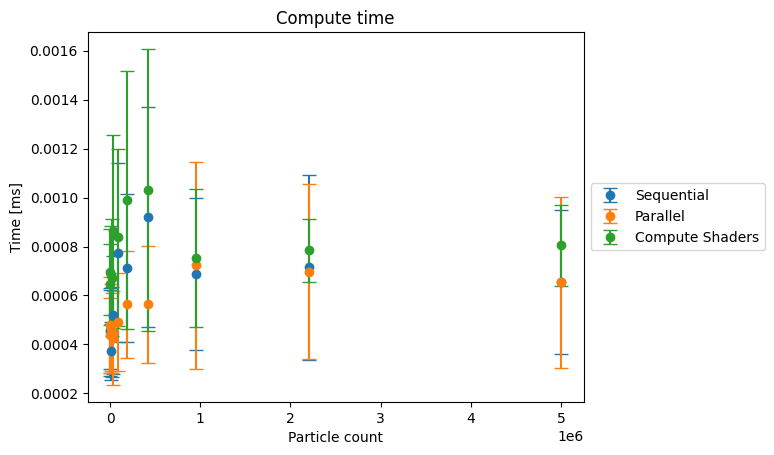

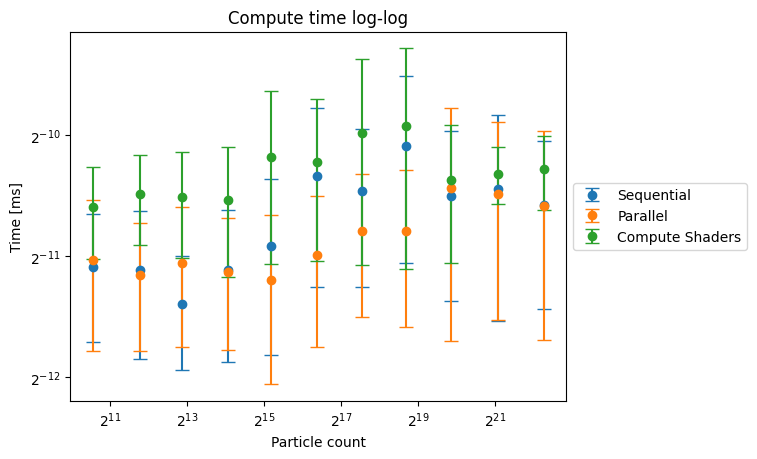

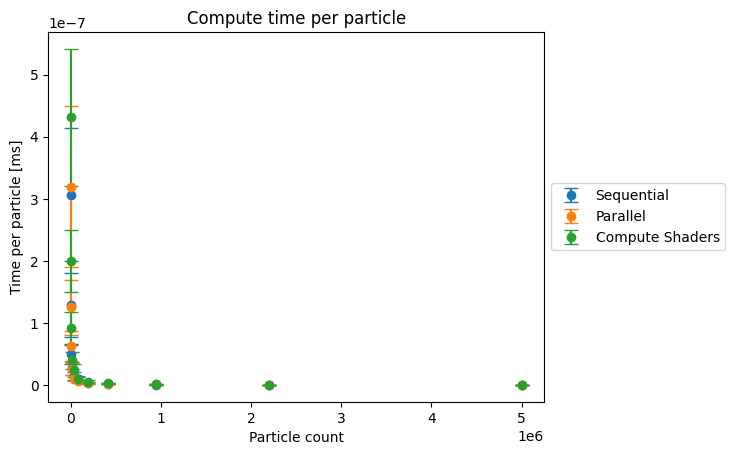

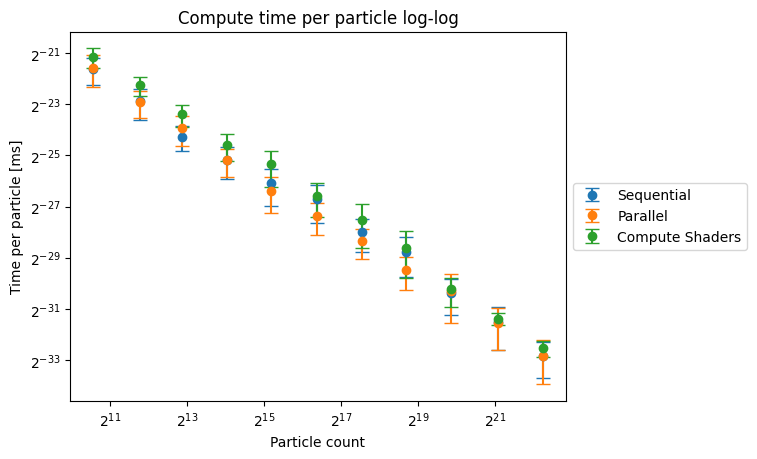

In [9]:
# Compute time
plt.errorbar(pd_seq["particle_count"], pd_seq["avg_time_compute"], pd_seq["avg_time_compute_err"], label="Sequential", fmt='o', capsize=5)
plt.errorbar(pd_par["particle_count"], pd_par["avg_time_compute"], pd_par["avg_time_compute_err"], label="Parallel", fmt='o', capsize=5)
plt.errorbar(pd_cs["particle_count"], pd_cs["avg_time_compute"], pd_cs["avg_time_compute_err"], label="Compute Shaders", fmt='o', capsize=5)

plt.xlabel("Particle count")
plt.ylabel("Time [ms]")
plt.title("Compute time")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Compute time log-log scale
plt.errorbar(pd_seq["particle_count"], pd_seq["avg_time_compute"], pd_seq["avg_time_compute_err"], label="Sequential", fmt='o', capsize=5)
plt.errorbar(pd_par["particle_count"], pd_par["avg_time_compute"], pd_par["avg_time_compute_err"], label="Parallel", fmt='o', capsize=5)
plt.errorbar(pd_cs["particle_count"], pd_cs["avg_time_compute"], pd_cs["avg_time_compute_err"], label="Compute Shaders", fmt='o', capsize=5)

plt.xlabel("Particle count")
plt.ylabel("Time [ms]")
plt.title("Compute time log-log")

plt.xscale('log', base=2)
plt.yscale('log', base=2)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Compute time per particle
plt.errorbar(pd_seq["particle_count"], pd_seq["avg_time_per_particle_compute"], pd_seq["avg_time_per_particle_compute_err"], label="Sequential", fmt='o', capsize=5)
plt.errorbar(pd_par["particle_count"], pd_par["avg_time_per_particle_compute"], pd_par["avg_time_per_particle_compute_err"], label="Parallel", fmt='o', capsize=5)
plt.errorbar(pd_cs["particle_count"], pd_cs["avg_time_per_particle_compute"], pd_cs["avg_time_per_particle_compute_err"], label="Compute Shaders", fmt='o', capsize=5)

plt.xlabel("Particle count")
plt.ylabel("Time per particle [ms]")
plt.title("Compute time per particle")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Compute time per particle log-log scale
plt.errorbar(pd_seq["particle_count"], pd_seq["avg_time_per_particle_compute"], pd_seq["avg_time_per_particle_compute_err"], label="Sequential", fmt='o', capsize=5)
plt.errorbar(pd_par["particle_count"], pd_par["avg_time_per_particle_compute"], pd_par["avg_time_per_particle_compute_err"], label="Parallel", fmt='o', capsize=5)
plt.errorbar(pd_cs["particle_count"], pd_cs["avg_time_per_particle_compute"], pd_cs["avg_time_per_particle_compute_err"], label="Compute Shaders", fmt='o', capsize=5)

plt.xlabel("Particle count")
plt.ylabel("Time per particle [ms]")
plt.title("Compute time per particle log-log")

plt.xscale('log', base=2)
plt.yscale('log', base=2)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

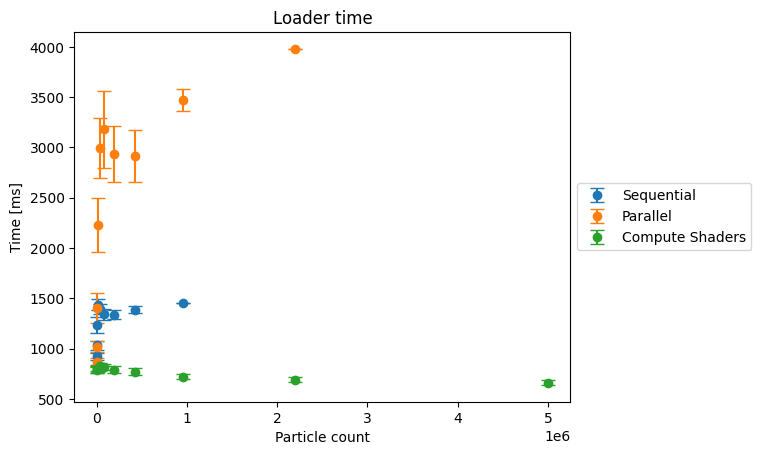

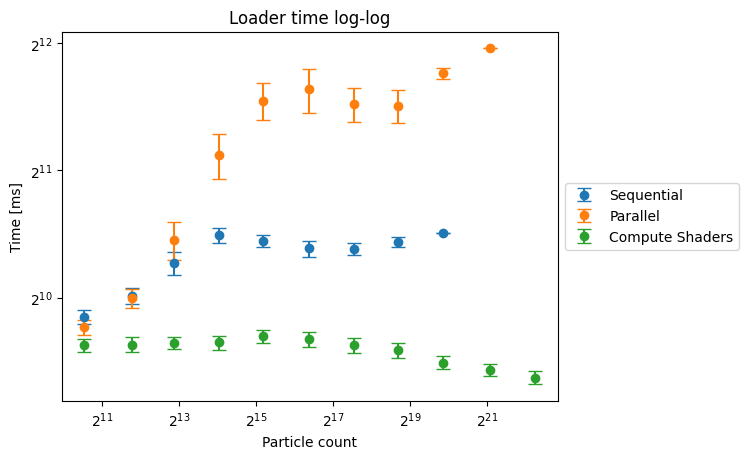

In [10]:
# Loader time
plt.errorbar(pd_seq["particle_count"], pd_seq["avg_time_loader"], pd_seq["avg_time_loader_err"], label="Sequential", fmt='o', capsize=5)
plt.errorbar(pd_par["particle_count"], pd_par["avg_time_loader"], pd_par["avg_time_loader_err"], label="Parallel", fmt='o', capsize=5)
plt.errorbar(pd_cs["particle_count"], pd_cs["avg_time_loader"], pd_cs["avg_time_loader_err"], label="Compute Shaders", fmt='o', capsize=5)

plt.xlabel("Particle count")
plt.ylabel("Time [ms]")
plt.title("Loader time")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Loader time log-log scale
plt.errorbar(pd_seq["particle_count"], pd_seq["avg_time_loader"], pd_seq["avg_time_loader_err"], label="Sequential", fmt='o', capsize=5)
plt.errorbar(pd_par["particle_count"], pd_par["avg_time_loader"], pd_par["avg_time_loader_err"], label="Parallel", fmt='o', capsize=5)
plt.errorbar(pd_cs["particle_count"], pd_cs["avg_time_loader"], pd_cs["avg_time_loader_err"], label="Compute Shaders", fmt='o', capsize=5)

plt.xlabel("Particle count")
plt.ylabel("Time [ms]")
plt.title("Loader time log-log")

plt.xscale('log', base=2)
plt.yscale('log', base=2)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

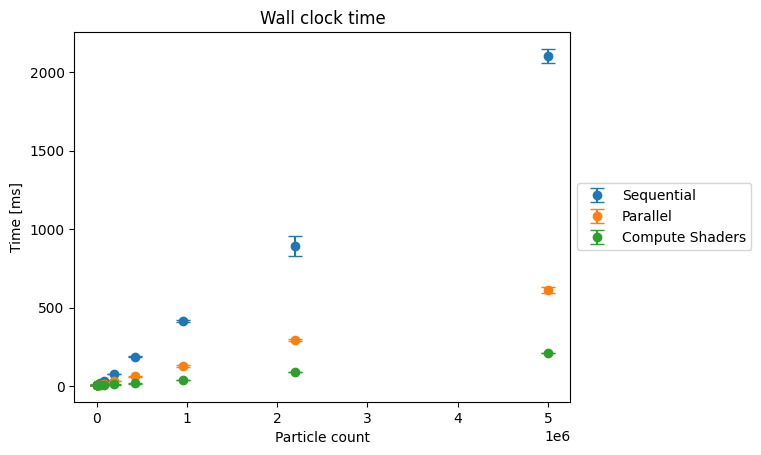

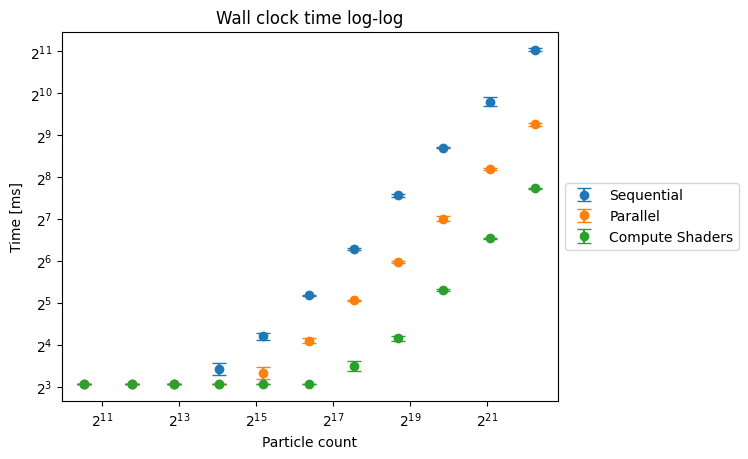

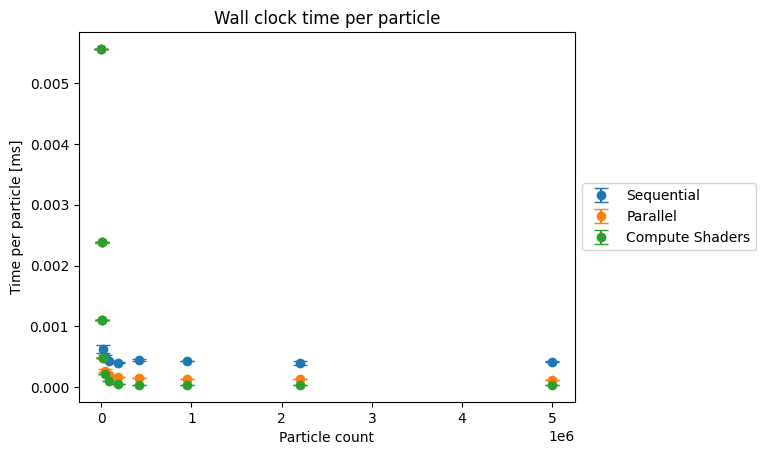

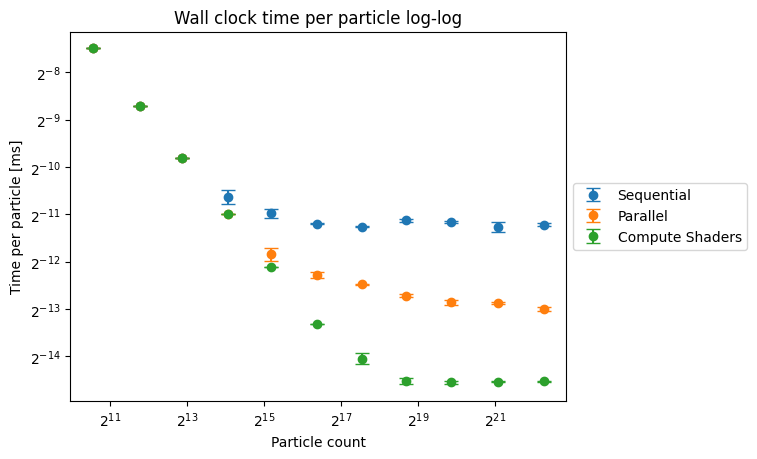

In [11]:
# Wall clock time
plt.errorbar(pd_seq["particle_count"], pd_seq["avg_time"], pd_seq["avg_time_err"], label="Sequential", fmt='o', capsize=5)
plt.errorbar(pd_par["particle_count"], pd_par["avg_time"], pd_par["avg_time_err"], label="Parallel", fmt='o', capsize=5)
plt.errorbar(pd_cs["particle_count"], pd_cs["avg_time"], pd_cs["avg_time_err"], label="Compute Shaders", fmt='o', capsize=5)

plt.xlabel("Particle count")
plt.ylabel("Time [ms]")
plt.title("Wall clock time")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Wall clock time log-log scale
plt.errorbar(pd_seq["particle_count"], pd_seq["avg_time"], pd_seq["avg_time_err"], label="Sequential", fmt='o', capsize=5)
plt.errorbar(pd_par["particle_count"], pd_par["avg_time"], pd_par["avg_time_err"], label="Parallel", fmt='o', capsize=5)
plt.errorbar(pd_cs["particle_count"], pd_cs["avg_time"], pd_cs["avg_time_err"], label="Compute Shaders", fmt='o', capsize=5)

plt.xlabel("Particle count")
plt.ylabel("Time [ms]")
plt.title("Wall clock time log-log")

plt.xscale('log', base=2)
plt.yscale('log', base=2)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Wall clock time per particle
plt.errorbar(pd_seq["particle_count"], pd_seq["avg_time_per_particle"], pd_seq["avg_time_per_particle_err"], label="Sequential", fmt='o', capsize=5)
plt.errorbar(pd_par["particle_count"], pd_par["avg_time_per_particle"], pd_par["avg_time_per_particle_err"], label="Parallel", fmt='o', capsize=5)
plt.errorbar(pd_cs["particle_count"], pd_cs["avg_time_per_particle"], pd_cs["avg_time_per_particle_err"], label="Compute Shaders", fmt='o', capsize=5)

plt.xlabel("Particle count")
plt.ylabel("Time per particle [ms]")
plt.title("Wall clock time per particle")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Wall clock time per particle log-log scale
plt.errorbar(pd_seq["particle_count"], pd_seq["avg_time_per_particle"], pd_seq["avg_time_per_particle_err"], label="Sequential", fmt='o', capsize=5)
plt.errorbar(pd_par["particle_count"], pd_par["avg_time_per_particle"], pd_par["avg_time_per_particle_err"], label="Parallel", fmt='o', capsize=5)
plt.errorbar(pd_cs["particle_count"], pd_cs["avg_time_per_particle"], pd_cs["avg_time_per_particle_err"], label="Compute Shaders", fmt='o', capsize=5)

plt.xlabel("Particle count")
plt.ylabel("Time per particle [ms]")
plt.title("Wall clock time per particle log-log")

plt.xscale('log', base=2)
plt.yscale('log', base=2)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

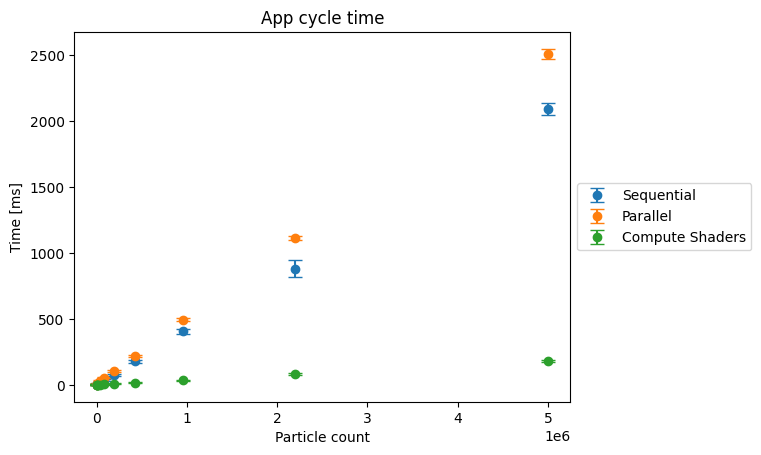

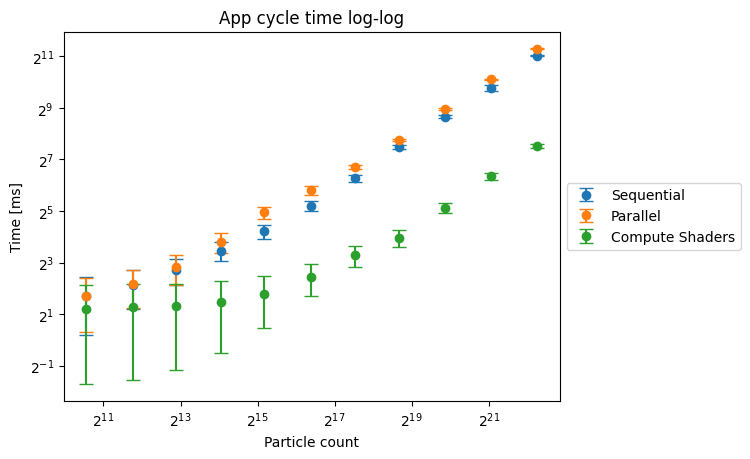

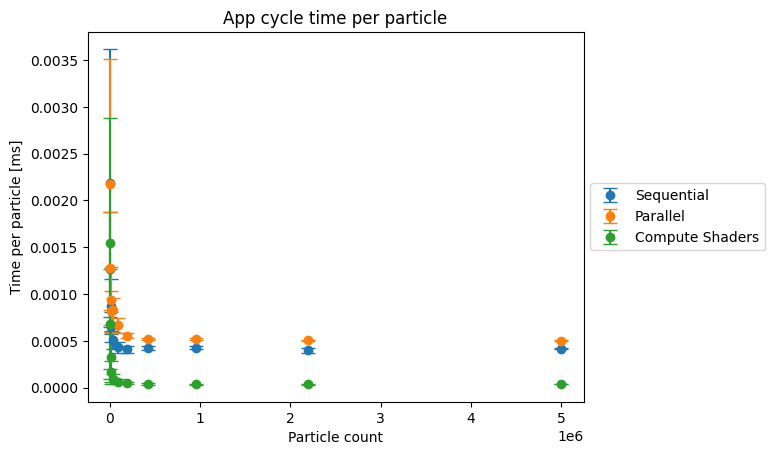

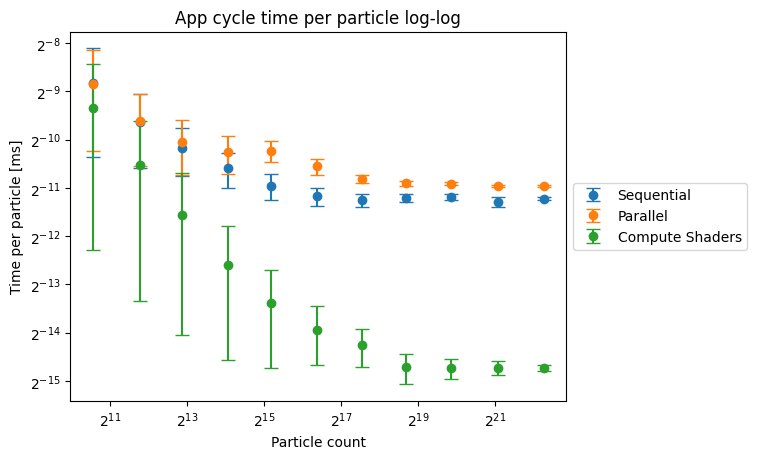

In [12]:
# App cycle time
plt.errorbar(pd_seq["particle_count"], pd_seq["avg_time_cpu"] + pd_seq["avg_time_render"], np.sqrt(pd_seq["avg_time_cpu_err"]**2 + pd_seq["avg_time_render_err"]**2), label="Sequential", fmt='o', capsize=5)
plt.errorbar(pd_par["particle_count"], pd_par["avg_time_cpu"] + pd_par["avg_time_render"], np.sqrt(pd_par["avg_time_cpu_err"]**2 + pd_par["avg_time_render_err"]**2), label="Parallel", fmt='o', capsize=5)
plt.errorbar(pd_cs["particle_count"], pd_cs["avg_time_cpu"] + pd_cs["avg_time_render"] + pd_cs["avg_time_compute"], np.sqrt(pd_cs["avg_time_cpu_err"]**2 + pd_cs["avg_time_render_err"]**2 + pd_cs["avg_time_compute_err"]**2), label="Compute Shaders", fmt='o', capsize=5)

plt.xlabel("Particle count")
plt.ylabel("Time [ms]")
plt.title("App cycle time")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# App cycle time log-log scale
plt.errorbar(pd_seq["particle_count"], pd_seq["avg_time_cpu"] + pd_seq["avg_time_render"], np.sqrt(pd_seq["avg_time_cpu_err"]**2 + pd_seq["avg_time_render_err"]**2), label="Sequential", fmt='o', capsize=5)
plt.errorbar(pd_par["particle_count"], pd_par["avg_time_cpu"] + pd_par["avg_time_render"], np.sqrt(pd_par["avg_time_cpu_err"]**2 + pd_par["avg_time_render_err"]**2), label="Parallel", fmt='o', capsize=5)
plt.errorbar(pd_cs["particle_count"], pd_cs["avg_time_cpu"] + pd_cs["avg_time_render"] + pd_cs["avg_time_compute"], np.sqrt(pd_cs["avg_time_cpu_err"]**2 + pd_cs["avg_time_render_err"]**2 + pd_cs["avg_time_compute_err"]**2), label="Compute Shaders", fmt='o', capsize=5)

plt.xlabel("Particle count")
plt.ylabel("Time [ms]")
plt.title("App cycle time log-log")

plt.xscale('log', base=2)
plt.yscale('log', base=2)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# App cycle time per particle
plt.errorbar(pd_seq["particle_count"], pd_seq["avg_time_per_particle_cpu"] + pd_seq["avg_time_per_particle_render"], np.sqrt(pd_seq["avg_time_per_particle_cpu_err"]**2 + pd_seq["avg_time_per_particle_render_err"]**2), label="Sequential", fmt='o', capsize=5)
plt.errorbar(pd_par["particle_count"], pd_par["avg_time_per_particle_cpu"] + pd_par["avg_time_per_particle_render"], np.sqrt(pd_par["avg_time_per_particle_cpu_err"]**2 + pd_par["avg_time_per_particle_render_err"]**2), label="Parallel", fmt='o', capsize=5)
plt.errorbar(pd_cs["particle_count"], pd_cs["avg_time_per_particle_cpu"] + pd_cs["avg_time_per_particle_render"] + pd_cs["avg_time_per_particle_compute"], np.sqrt(pd_cs["avg_time_per_particle_cpu_err"]**2 + pd_cs["avg_time_per_particle_render_err"]**2 + pd_cs["avg_time_per_particle_compute_err"]**2), label="Compute Shaders", fmt='o', capsize=5)

plt.xlabel("Particle count")
plt.ylabel("Time per particle [ms]")
plt.title("App cycle time per particle")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# App cycle time per particle log-log scale
plt.errorbar(pd_seq["particle_count"], pd_seq["avg_time_per_particle_cpu"] + pd_seq["avg_time_per_particle_render"], np.sqrt(pd_seq["avg_time_per_particle_cpu_err"]**2 + pd_seq["avg_time_per_particle_render_err"]**2), label="Sequential", fmt='o', capsize=5)
plt.errorbar(pd_par["particle_count"], pd_par["avg_time_per_particle_cpu"] + pd_par["avg_time_per_particle_render"], np.sqrt(pd_par["avg_time_per_particle_cpu_err"]**2 + pd_par["avg_time_per_particle_render_err"]**2), label="Parallel", fmt='o', capsize=5)
plt.errorbar(pd_cs["particle_count"], pd_cs["avg_time_per_particle_cpu"] + pd_cs["avg_time_per_particle_render"] + pd_cs["avg_time_per_particle_compute"], np.sqrt(pd_cs["avg_time_per_particle_cpu_err"]**2 + pd_cs["avg_time_per_particle_render_err"]**2 + pd_cs["avg_time_per_particle_compute_err"]**2), label="Compute Shaders", fmt='o', capsize=5)

plt.xlabel("Particle count")
plt.ylabel("Time per particle [ms]")
plt.title("App cycle time per particle log-log")

plt.xscale('log', base=2)
plt.yscale('log', base=2)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

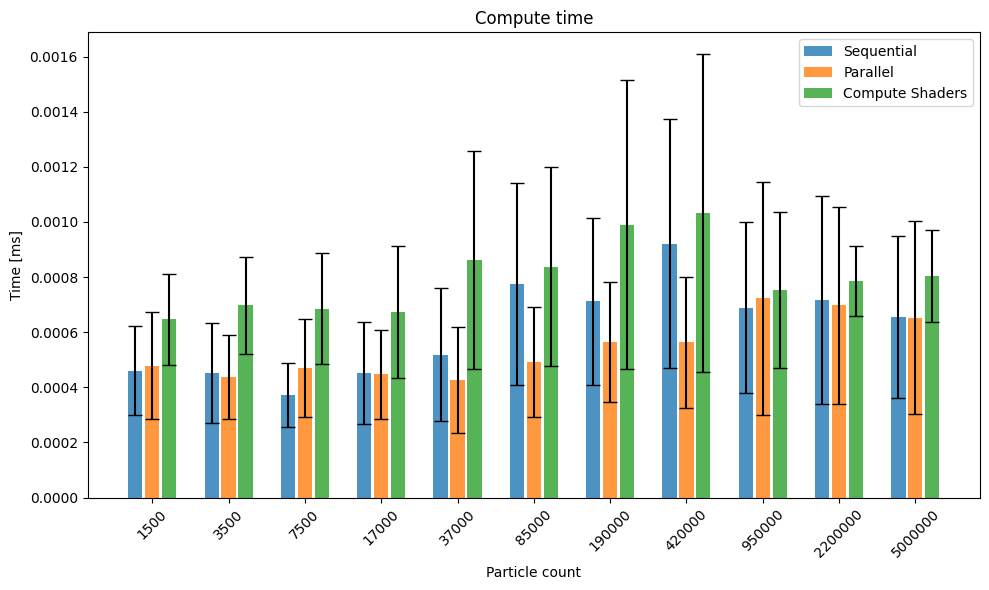

In [13]:
# Time bar graphs
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
bar_spacing = 0.05
opacity = 0.8
group_spacing = 0.5

bar1 = np.arange(len(pd_seq["particle_count"])) * (3 * bar_width + 2 * bar_spacing + group_spacing)
bar2 = [x + bar_width + bar_spacing for x in bar1]
bar3 = [x + bar_width + bar_spacing for x in bar2]

bar1 = plt.bar(bar1, pd_seq["avg_time_compute"], bar_width, yerr=pd_seq["avg_time_compute_err"], label="Sequential", alpha=opacity, capsize=5)
bar2 = plt.bar(bar2, pd_par["avg_time_compute"], bar_width, yerr=pd_par["avg_time_compute_err"], label="Parallel", alpha=opacity, capsize=5)
bar3 = plt.bar(bar3, pd_cs["avg_time_compute"], bar_width, yerr=pd_cs["avg_time_compute_err"], label="Compute Shaders", alpha=opacity, capsize=5)

plt.xlabel("Particle count")
plt.ylabel("Time [ms]")
plt.title("Compute time")

plt.xticks([r*(1 + group_spacing - bar_width/2 - bar_spacing/2) + bar_width + bar_spacing for r in range(len(pd_seq["particle_count"]))], pd_seq["particle_count"])
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()